# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:

# EH:  Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Retrieve the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")

#EH:  check datatype of QUANDL API KEY
type(quandl_api_key)

str

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

#EH:  Specify current number of BTC crypto asset held
btc_coins = 1.2

#EH:  Specify current number of ETH crypto asset held
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income

#EH:  assign monthly income
monthly_income=12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

#EH: assign variable to btc and eth url respectively.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC

# EH:  get API data in readable format
btc_response = requests.get('https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD').json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

#EH:  Display API data
print(json.dumps(btc_response,indent=4,sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18942512,
            "id": 1,
            "last_updated": 1643407410,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 718067820792,
                    "percent_change_1h": 0.235853506984339,
                    "percent_change_24h": 4.26760837398561,
                    "percent_change_7d": -6.91698066957549,
                    "percentage_change_1h": 0.235853506984339,
                    "percentage_change_24h": 4.26760837398561,
                    "percentage_change_7d": -6.91698066957549,
                    "price": 37892.0,
                    "volume_24h": 54850329438
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18942512,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [8]:
# Using the Python requests library, make an API call to access the current price ETH

# EH:  get API data in readable format
eth_response = requests.get('https://api.alternative.me/v2/ticker/Ethereum/?convert=USD').json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

#EH:  Display API data
print(json.dumps(eth_response,indent=4,sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119351411,
            "id": 1027,
            "last_updated": 1643407468,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 303388824976,
                    "percent_change_1h": 0.948738339537831,
                    "percent_change_24h": 7.88253330079454,
                    "percent_change_7d": -15.7706927567593,
                    "percentage_change_1h": 0.948738339537831,
                    "percentage_change_24h": 7.88253330079454,
                    "percentage_change_7d": -15.7706927567593,
                    "price": 2540.01,
                    "volume_24h": 15157404275
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119351411,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC

#EH:  get BTC current price
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC

#EH:  Display BTC current price
btc_price

37892.0

In [10]:
# Navigate the BTC response object to access the current price of ETH

#EH:  get ETH current price
eth_price = eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH

#EH:  Display ETH current price
eth_price


2540.01

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 

#EH:  calculate current BTC holding value
btc_value = btc_price * btc_coins


# Print current value of your holding in BTC

#EH:  state current BTC holding value
print(f'The current value of your holding in BTC is USD {btc_value:,}')


The current value of your holding in BTC is USD 45,470.4


In [12]:
# Compute the current value of the ETH holding 

#EH:  calculate current ETH holding value
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
#EH:  state current ETH holding value
print(f'The current value of your holding in ETH is USD {round(eth_value,2):,}')


The current value of your holding in ETH is USD 13,462.05


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

#EH:  add up current BTC and ETH holding values
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

#EH:  state current total of BTC and ETH holding value
print(f'Your current cryptocurrency wallet balanace is USD {round(total_crypto_wallet,2):,}')


Your current cryptocurrency wallet balanace is USD 58,932.45


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

#EH:  set number of SPY shares
spy_shares = 110

#EH:  set number of AGG shares
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys

#EH:  get ALPACA API KEY from local environment file
alpaca_api_key=os.getenv("ALPACA_API_KEY")

#EH:  get ALPACA SECRET KEY from local environment file
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

#EH:  set up ALPACA tradeapi.REST object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)
    


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio

#EH:  set SPY, AGG ticker names into a list
tickers=['SPY','AGG']

# Set timeframe to 1D 

#EH:  set up timeframe for alpaca
timeframe='1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

#EH:  assign start and end dates as 2020/08/07 in UTC timezone and ISO standard.
start_date = pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [17]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

#EH:  get 2020/08/07 SPY, AGG data from ALPACA in DataFrame format and assign the data to profolio_df
profolio_df=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df

# Review the first 5 rows of the Alpaca DataFrame

#EH:  display 2020/08/07 SPY, AGG DataFrame first 5 rows
profolio_df.head()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

#EH:  Get AGG close price value as float datatype
agg_close_price = profolio_df['AGG']['close'][0].astype('float')

# Print the AGG closing price

#EH:  State AGG closing price 
print(f'AGG closing price is {agg_close_price} on 2020/08/07.')


AGG closing price is 119.445 on 2020/08/07.


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

#EH:  Get SPY close price value as float datatype
spy_close_price = profolio_df['SPY']['close'][0].astype('float')

# Print the SPY closing price
#EH:  State AGG closing price 
print(f'SPY closing price is {spy_close_price} on 2020/08/07.')


SPY closing price is 334.55 on 2020/08/07.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio

#EH:  Calculate AGG bond values
agg_value = agg_close_price *agg_shares

# Print the current value of the bond portfolio

#EH: state AGG bond current value
print(f'The current value of AGG bond portfolio is USD {agg_value:,} on 2020/08/07.')



The current value of AGG bond portfolio is USD 23,889.0 on 2020/08/07.


In [21]:
# Calculate the current value of the stock portion of the portfolio

#EH:  Calculate SPY stock values
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
#EH: state SPY stock current value
print(f'The current value of SPY stock portfoil is USD {spy_value:,} on 2020/08/07.')


The current value of SPY stock portfoil is USD 36,800.5 on 2020/08/07.


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio

#EH:  sum up AGG bond value and SPY stock value
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
#EH:  state the current sum balance of SPY stock and AGG bond
print(f'The current balance of SPY stock and AGG bond portion of the portfolio is USD {total_stocks_bonds:,} as of 2020/08/07.')


The current balance of SPY stock and AGG bond portion of the portfolio is USD 60,689.5 as of 2020/08/07.


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

#EH:  sum up crypto wallet and total stock and bond value
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance

#EH:  state current crypto wallet balance
print(f'Your current cryptocurrency wallet balanace is USD {round(total_crypto_wallet,2):,}')

#print total portfoilo value of the cryptocurrency wallet balance and stock/bond portfolio

#EH:  state total value of crypto wallet, stock and bond value
print(f'Total value of the cryptocurrency wallet balance and stock/bond portfolio is USD {round(total_portfolio,2):,}')


Your current cryptocurrency wallet balanace is USD 58,932.45
Total value of the cryptocurrency wallet balance and stock/bond portfolio is USD 119,621.95


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list

#EH:  make savings data list to store total crypto wallet value and total stock bond value
savings_data=[total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data

#EH:  display savings data list
savings_data
    

[58932.453, 60689.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 

#Create savings_df DataFrame from savings_data list
savings_df=pd.DataFrame(
    data=savings_data,
    columns=['amount'],
    index=['crypto','stock/bond']
)

# Display the savings_df DataFrame

#EH:  display savings DataFrame
savings_df


,amount
crypto,58932.453
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

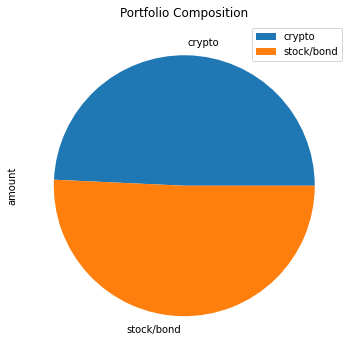

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

#EH:  Create Pie chart for crypto, stock/bond values
savings_df.plot.pie(y='amount',figsize=(10,6),title='Portfolio Composition')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value

#EH: Define Emergency fund value
emergency_fund_value = 3 *monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

#EH:  if user portolio value is greater than emergency fund, state that the emergency fund has enough fund.
if total_portfolio > emergency_fund_value:
    print(f'Congratulation!  The emergency fund has enough fund!')

#EH:  if user portolio value equates emergency fund, state that the financial goal of sufficient emergency fund is reached.
elif total_portfolio == emergency_fund_value:
    print(f'Congratulation on reaching the important financial goal of having sufficnet emergency fund!')

#EH:  if user portolio value is less than emergency fund, state that the amount short from emergency fund goal.
else:
    print(f'You are USD {emergency_fund_value - total_portfolio} away from reaching the emergency fund goal!')


Congratulation!  The emergency fund has enough fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

#EH:  set start date as 2019/01/26 in UTC timezone and iso standard.
start_date=pd.Timestamp('2019-01-26', tz="America/New_York").isoformat()

#EH:  set start date as 2022/01/25 in UTC timezone and iso standard.
end_date=pd.Timestamp('2022-01-25', tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows

#EH:  Set row limit as 1000
num_row=1000

In [30]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

#EH:  Get AGG, SPY data from ALPACA API
profolio_for_simulate_df=alpaca.get_barset(
    #EH:  ticker list has AGG, SPY ticker names
    tickers,
    #EH:  Timeframe is set as 1 day
    timeframe,
    #EH:  start date as 2019-01-26
    start=start_date,
    #EH:  start date as 2022-01-25
    end=end_date,
    #EH:  limit to 1000 rows
    limit=num_row
#EH:  data store as DataFrame
).df


# Display both the first and last five rows of the DataFrame

#EH:  Display both the first and last 5 rows of the AGG, SPY DataFrame
display(profolio_for_simulate_df.head())
display(profolio_for_simulate_df.tail())


AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2019-01-28 00:00:00-05:00  263.39  263.82  261.79  263.6350  75207990  
2019-01-29 00:00:00-05:00  263.92  264.55  262.48  263.3100  54249161  
2019-01-30 00:00:00-05:00  265.10  268.52  264.25  267.4625  75091893  
2019-01-31 00:00:00-05:00  267.51  270.47  267.27  270.2325  73699733  
2019-02-01 00:00:00-05:00  270.15  271.20  269.18  270.0700  68194167

AGG                                      \
                               open    high     low   close      volume   
time                                                                      
2022-01-19 00:00:00-05:00  111.7000  111.89  111.65  111.71   7641972.0   
2022-01-20 00:00:00-05:00  111.8400  111.90  111.75  111.79   6861797.0   
2022-01-21 00:00:00-05:00  112.1900  112.35  112.11  112.24   7789076.0   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672.0   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.96  112.00   9392367.0   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2022-01-19 00:00:00-05:00  458.17  459.6124  451.46  451.79   95311817  
2022-01-20 00:00:00-05:00  453.75  458.7400  444.50  446.79  105009751  
2022-01-21 00:00:00-05:00  445.56  448.0600  437.97  438.11  174541931  
2022-01-24 00:00:00-05:00  432.03  440.3800  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  433.06  439.7200  364.68  434.51  148023735

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

#EH:  Run Monte Carlo simulation of AGG/SPY DataFrame to forecast 30 years
MC_30year=MCSimulation(
    #EH:  use AGG/SPY portfoliio AGG/SPY DataFrame to simulate
    portfolio_data=profolio_for_simulate_df,
    
    #EH:  simulate weight is 40% of AGG and 60% of SPY
    weights=[.40,.60],
    
    #EH:  set simulation numbers as 500
    num_simulation = 500,
    
    #EH:  set number of trading days as 30 years of 252 trade days
    num_trading_days = 252*30
)

# Review the simulation input data

#EH:  Display Monte Carlo simulations of 30-year and 500 samples of AGG/SPY DataFrame
MC_30year.portfolio_data.head()


AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

#EH:  Simulate 30-year cumulative returns of 500 samples of AGG/SPY DataFrame
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\eunic\onedrive\desktop\FinTech Class\Financial_Planner\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012108,1.005010,0.999888,0.986738,0.997922,0.998567,0.984062,1.001628,1.012854,1.010917,...,1.010241,0.993701,0.996323,0.993685,1.012293,1.009369,0.988138,0.998192,1.004170,0.994229
2,1.023522,1.022636,1.001669,0.991068,1.005135,0.998729,0.987644,0.999835,1.016926,1.013592,...,1.014512,0.990876,0.985709,0.988388,1.021023,1.012830,0.980056,0.994245,1.019902,0.995402
3,1.022607,1.031073,0.982580,0.988534,1.001260,1.004597,0.979422,0.996916,1.016616,1.012512,...,1.020759,0.983572,0.994458,0.995459,1.029465,1.014899,0.982696,0.996398,0.995063,0.987045
4,1.017040,1.027129,0.986230,0.992103,0.993796,1.022295,0.987813,1.004278,1.010241,1.031362,...,1.014217,0.979518,0.983198,0.998080,1.033211,1.019613,0.990186,0.995590,0.986973,0.986899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,44.570166,13.500438,33.419469,56.779192,67.178319,60.766444,71.438886,23.670242,14.843503,8.530273,...,75.166148,17.819104,53.591143,40.138683,23.639955,24.900434,22.730327,16.388745,11.914623,37.380495
7557,45.111938,13.421503,33.247931,57.223732,67.269637,61.221250,70.318489,23.689596,15.060422,8.568889,...,75.087743,18.027727,53.365266,40.270176,23.858944,24.929189,22.837639,16.287141,11.977852,37.819671
7558,44.535219,13.392428,33.810343,57.147142,68.187776,61.631901,69.738571,23.656755,15.252028,8.431423,...,74.475910,18.189658,52.899090,40.334542,23.543687,24.789130,22.792652,16.420056,11.965226,37.841272
7559,44.860958,13.391835,33.937697,56.595145,67.296200,62.709256,69.332810,23.499681,15.231797,8.252929,...,73.757325,18.010916,53.226952,40.521305,23.430296,24.471224,23.206479,16.270745,11.902145,37.630187


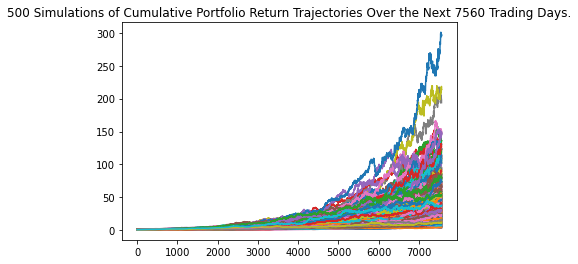

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

#EH:  Visulize overlay line plot of the 30-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_30yr_lineplot=MC_30year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

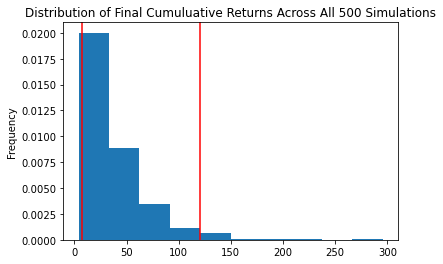

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

#EH:  Visulize the probability distriubtion of the 30-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_30yr_distribution_plot=MC_30year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

#EH:  summarize stats of 30-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_30year_stats = MC_30year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
#EH:  State the summary stats of 30-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
print(MC_sim_30year_stats)

count           500.000000
mean             38.001358
std              31.150327
min               3.948700
25%              18.258317
50%              27.952311
75%              47.763203
max             295.671719
95% CI Lower      7.274207
95% CI Upper    120.135362
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio

#EH:  State the current balance of SPY stock and AGG bond
print(f'The current balance of SPY stock and AGG bond portion of the portfolio is USD {total_stocks_bonds:,}.')



The current balance of SPY stock and AGG bond portion of the portfolio is USD 60,689.5.


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

#EH:  calculate the 95% confidence interval lower's cumulative return values for current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds * MC_sim_30year_stats[8]

#EH:  calculate the 95% confidence interval uppers cumulative return values for current stock/bond portfolio
ci_upper_thirty_cumulative_return = total_stocks_bonds * MC_sim_30year_stats[9]

# Print the result of your calculations

#EH:  State the result of CI 95% lower and upper cumulative return values.
print(f"There is a 95% chance that an stock/bond investment of ${total_stocks_bonds:,} in the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${round(ci_lower_thirty_cumulative_return,2):,} and ${round(ci_upper_thirty_cumulative_return,2):,}.")


There is a 95% chance that an stock/bond investment of $60,689.5 in the portfolio over the next 30 years will end within in the range of $441,468.0 and $7,290,955.02.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

#EH:  Run Monte Carlo simulation of AGG/SPY DataFrame to forecast 10 years
MC_10year=MCSimulation(
    
    #EH:  use AGG/SPY portfoliio AGG/SPY DataFrame to simulate
    portfolio_data=profolio_for_simulate_df,
    
    #EH:  apply weights as 20% AGG bonds and 80% SPY stock
    weights=[.20,.80],
    
    #EH:  Set number of simulation as 500
    num_simulation = 500,
    
    #EH:  set number of trading days as 10 years of 252 trade days 
    num_trading_days = 252*10
)

# Review the simulation input data
#EH:  Display Monte Carlo simulations of 10-year and 500 samples of AGG/SPY DataFrame
MC_10year.portfolio_data.head()


AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

#EH:  Simulate 10-year cumulative returns of 500 samples of AGG/SPY DataFrame
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\eunic\onedrive\desktop\FinTech Class\Financial_Planner\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999987,1.016454,1.010315,1.004602,0.989090,1.006143,0.985414,1.013088,1.016674,0.986113,...,1.018182,0.987401,0.988679,0.993117,1.002927,1.008172,1.010202,1.009103,0.989762,1.007864
2,1.014583,1.005388,1.007230,1.008754,1.011379,0.994404,0.985690,1.000578,1.004609,0.995714,...,1.024802,0.982422,0.989390,0.984209,0.999059,1.009864,1.008068,0.994861,0.994324,0.990919
3,1.009395,1.014786,1.025832,1.003152,1.011305,1.012322,0.989659,1.018512,0.998161,0.986462,...,1.023475,0.969056,0.991670,0.998262,0.998227,1.038182,1.008774,0.975030,0.998206,0.994235
4,1.022388,1.007498,1.018118,1.018786,1.000873,1.011736,1.010696,1.023939,0.989995,0.980490,...,1.032598,0.983563,0.993949,1.026017,1.012930,1.030430,1.009956,0.967655,0.993074,0.989566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.827838,3.129840,3.407675,4.116343,2.361641,16.664466,2.962979,6.202533,1.285916,4.697117,...,5.589418,3.998652,7.103424,5.244253,8.495327,3.968594,9.732981,3.552029,3.777235,1.497640
2517,5.874625,3.158525,3.386780,4.169160,2.376343,16.478701,2.943127,6.232623,1.284547,4.679715,...,5.688802,4.007399,7.041142,5.267515,8.376964,3.985895,9.696308,3.581470,3.781832,1.509844
2518,5.906498,3.173327,3.325375,4.080755,2.339633,16.748359,2.929337,6.115691,1.293950,4.708592,...,5.713770,3.944740,6.978334,5.402455,8.148267,4.052855,9.470971,3.578723,3.834099,1.514793
2519,5.804697,3.168552,3.390102,4.095528,2.387710,16.440120,2.956395,6.081421,1.288986,4.695509,...,5.708334,4.019446,6.784844,5.431274,8.190839,4.117523,9.566997,3.633685,3.863099,1.513815


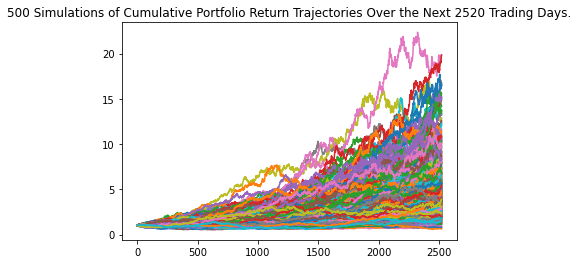

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

#EH:  Visulize overlay line plot of the 10-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_10yr_lineplot=MC_10year.plot_simulation()

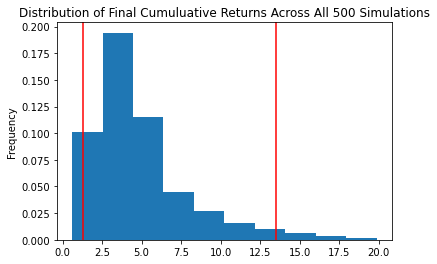

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

#EH:  Visulize the probability distriubtion of the 10-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_10yr_distribution_plot=MC_10year.plot_distribution()



In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
#EH:  summarize stats of 10-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_10year_stats = MC_10year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
#EH:  State the summary stats of 10-year Monte Carlo cumulative return simulation of AGG/SPY Dataframe
MC_sim_10year_stats

count           500.000000
mean              4.894260
std               3.073037
min               0.611042
25%               2.871204
50%               4.046188
75%               5.867461
max              19.863518
95% CI Lower      1.306624
95% CI Upper     13.479643
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio

#EH:  State the current balance of SPY stock and AGG bond
print(f'The current balance of SPY stock and AGG bond portion of the portfolio is USD {total_stocks_bonds:,}.')


The current balance of SPY stock and AGG bond portion of the portfolio is USD 60,689.5.


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

#EH:  calculate the 95% confidence interval lower's cumulative return values for current stock/bond portfolio for 10-year simulation
ci_lower_ten_cumulative_return =total_stocks_bonds * MC_sim_10year_stats[8]

#EH:  calculate the 95% confidence interval upper's cumulative return values for current stock/bond portfolio for 10-year simulation
ci_upper_ten_cumulative_return = total_stocks_bonds * MC_sim_10year_stats[9]


# Print the result of your calculations

#EH:  State the result of CI 95% lower and upper cumulative return values for 10-year simulation
print(f"There is a 95% chance that an stock/bond investment of ${total_stocks_bonds:,} in the portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${round(ci_lower_ten_cumulative_return,2):,} and ${round(ci_upper_ten_cumulative_return,2):,}.")

There is a 95% chance that an stock/bond investment of $60,689.5 in the portfolio over the next 10 years will end within in the range of $79,298.35 and $818,072.78.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer**  No, the the portolio weighting more heavily to stocks for only 10 years will not allow credit union embers to retire after only 10 years.  This is because the size of investment amount is small.  Retirement funds requires at least 25 times of yearly retirement expense or 10 times of current yearly salary in order to cover the inflation and have sufficient retirement funds.